In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from category_encoders import OrdinalEncoder
import h2o
import os

In [2]:
df = pd.read_csv("results-20200118-175936.csv")

In [3]:
df.head()

,EventTimestamp,SearchId,Distributor,DealerETAGroup,Price,Quality,Position,DealerOpened,RecommendationType,deviceid,...,QualityRank,ETA,GeoPoint,RecommendationTypeCleaned,DealerOpenedBinary,DayOfWeek,Month,Hour,City,State
0,2019-06-05 03:39:41.523003 UTC,__mP5aoeKZ+ShWI2odvN73Ta/8Jeo/wIZhOfiLFPmVsqo=...,SUPERGASBRAS,30-45,73.00,5.00000,4,False,NaN,__mP5aoeKZ+ShWI2odvN73Ta/8Jeo/wIZhOfiLFPmVsqo=,...,1,37.5,POINT(-51.0603269 -29.9105758),NaN,0,4,6,3,Gravataí,Rio Grande do Sul
1,2019-06-05 03:39:41.523003 UTC,__mP5aoeKZ+ShWI2odvN73Ta/8Jeo/wIZhOfiLFPmVsqo=...,NACIONALGAS,15-30,68.00,4.90000,1,False,NaN,__mP5aoeKZ+ShWI2odvN73Ta/8Jeo/wIZhOfiLFPmVsqo=,...,2,22.5,POINT(-51.0603269 -29.9105758),NaN,0,4,6,3,Gravataí,Rio Grande do Sul
2,2019-06-20 17:00:47.681001 UTC,__65luIOVbTau7Kx4ECjXANQaX1uS6bbaB2wx0N1ykEfc=...,MULTIMARCAS,15-30,66.00,4.83871,3,True,NaN,__65luIOVbTau7Kx4ECjXANQaX1uS6bbaB2wx0N1ykEfc=,...,6,22.5,POINT(-46.4479570773082 -23.6594165881566),NaN,1,5,6,17,Mauá,Sao Paulo
3,2019-08-07 18:26:20.457010 UTC,__rxcgizpeLkqbh8jAHQieCdzeWzUvlM4eqKtGXCoE7Qw=...,MULTIMARCAS,15-30,59.99,4.70000,1,True,NaN,__rxcgizpeLkqbh8jAHQieCdzeWzUvlM4eqKtGXCoE7Qw=,...,8,22.5,POINT(-46.4184492 -23.6633445),NaN,1,4,8,18,Mauá,Sao Paulo
4,2019-07-21 19:51:27.190048 UTC,__foHWKtHMOENsDZYNF0Gs9qhI3jxwRSVvls4U08a26BQ=...,COPAGAZ,15-30,69.99,5.00000,5,False,NaN,__foHWKtHMOENsDZYNF0Gs9qhI3jxwRSVvls4U08a26BQ=,...,1,22.5,POINT(-46.4458562 -23.6730543),NaN,0,1,7,19,Mauá,Sao Paulo


In [4]:
df.dtypes

EventTimestamp                object
SearchId                      object
Distributor                   object
DealerETAGroup                object
Price                        float64
Quality                      float64
Position                       int64
DealerOpened                    bool
RecommendationType            object
deviceid                      object
lat                          float64
long                         float64
Conversion                     int64
DealerId                      object
LocationTwoDecimals           object
LocationThreeDecimals         object
PriceRank                      int64
QualityRank                    int64
ETA                          float64
GeoPoint                      object
RecommendationTypeCleaned     object
DealerOpenedBinary             int64
DayOfWeek                      int64
Month                          int64
Hour                           int64
City                          object
State                         object
d

In [5]:
conversion_by_position = df.groupby(by=["Position"]).agg(["mean"])["Conversion"].reset_index()

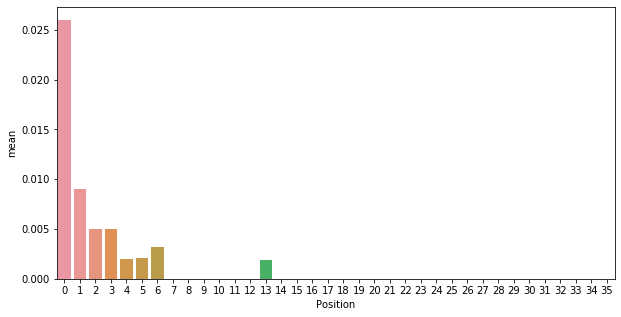

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
plot_conversion_by_position = sns.barplot(x=conversion_by_position["Position"], y=conversion_by_position["mean"])

In [7]:
conversion_by_rec_type = df.fillna("N/A").groupby(by=["RecommendationTypeCleaned"]).agg(["mean"])["Conversion"].reset_index().sort_values(by=["mean"], ascending=[False])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

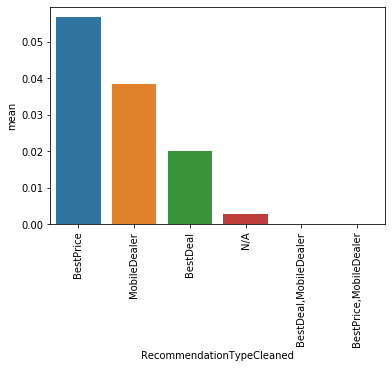

In [8]:
plot_conversion_by_rec_type = sns.barplot(x=conversion_by_rec_type["RecommendationTypeCleaned"], y=conversion_by_rec_type["mean"])
plt.xticks(rotation=90)

In [9]:
conversion_by_distributor = df.groupby(by=["Distributor"]).agg(["mean"])["Conversion"].reset_index().sort_values(by=["mean"], ascending=[False])

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

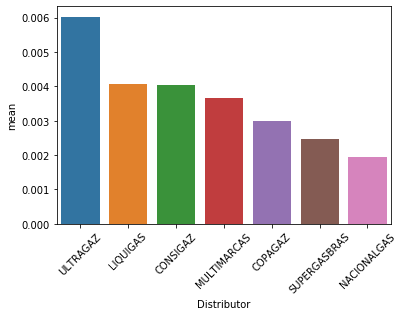

In [10]:
plot_conversion_by_distributor = sns.barplot(x=conversion_by_distributor["Distributor"], y=conversion_by_distributor["mean"])
plt.xticks(rotation=45)

In [11]:
conversion_by_month = df.groupby(by=["Month"]).agg(["mean"])["Conversion"].reset_index().sort_values(by=["Month"], ascending=[True])

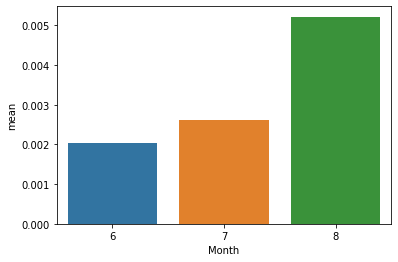

In [12]:
plot_conversion_by_month = sns.barplot(x=conversion_by_month["Month"], y=conversion_by_month["mean"])

In [13]:
conversion_by_city = df.groupby(by=["City"]).agg(["mean"])["Conversion"].reset_index().sort_values(by=["mean"], ascending=[False])

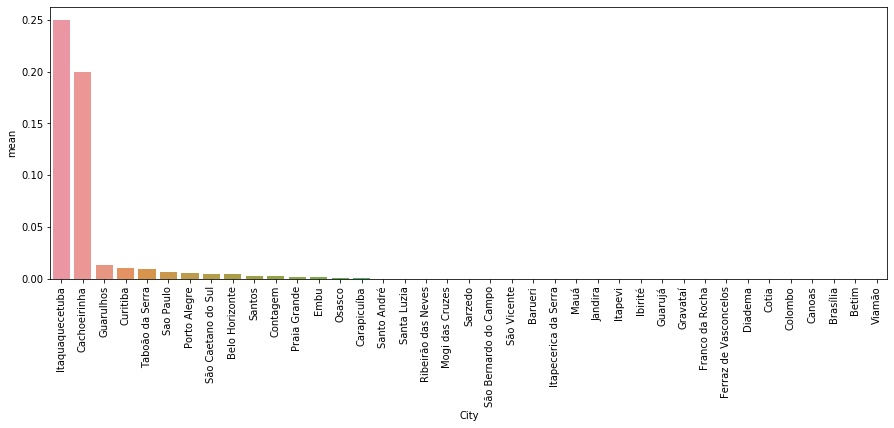

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
plot_conversion_by_city = sns.barplot(ax=ax, x=conversion_by_city["City"], y=conversion_by_city["mean"])
ticks = plt.xticks(rotation=90)

In [15]:
conversion_by_state = df.groupby(by=["State"]).agg(["mean"])["Conversion"].reset_index().sort_values(by=["mean"], ascending=[False])

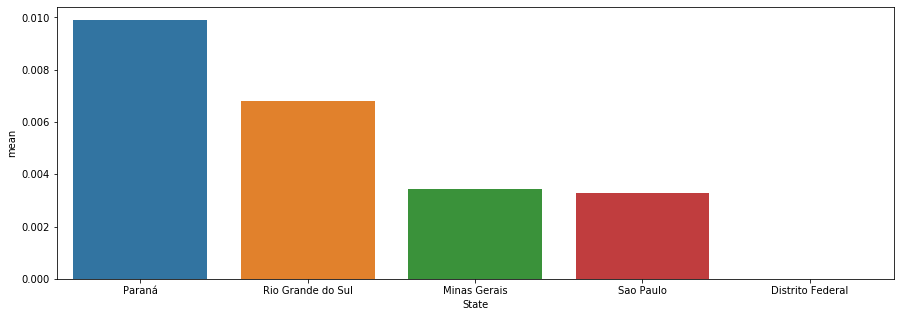

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
plot_conversion_by_state = sns.barplot(ax=ax, x=conversion_by_state["State"], y=conversion_by_state["mean"])

In [17]:
df["PriceInterval"] = pd.cut(df["Price"], bins=10)

In [18]:
conversion_by_price_interval = df.groupby(by=["PriceInterval"]).agg(["mean"])["Conversion"].reset_index()

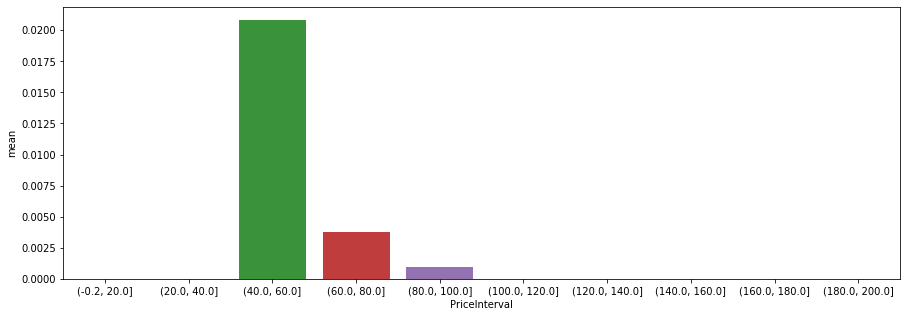

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
plot_conversion_by_price_interval = sns.barplot(ax=ax, x=conversion_by_price_interval["PriceInterval"], y=conversion_by_price_interval["mean"])

In [20]:
df["QualityInterval"] = pd.cut(df["Quality"], bins=10)

In [21]:
conversion_by_quality_interval = df.groupby(by=["QualityInterval"]).agg(["mean"])["Conversion"].reset_index()

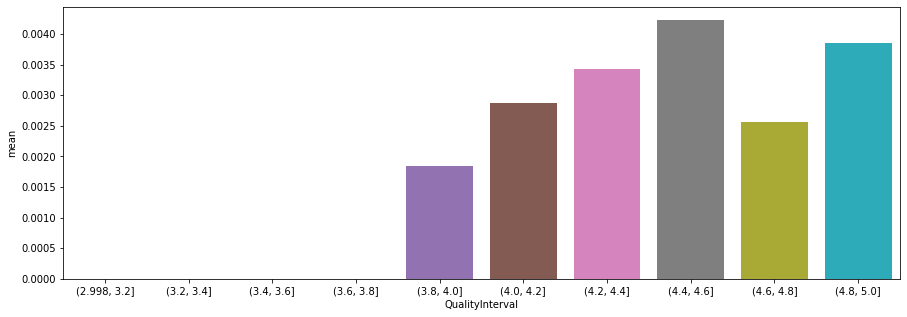

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
plot_conversion_by_quality_interval = sns.barplot(ax=ax, x=conversion_by_quality_interval["QualityInterval"], y=conversion_by_quality_interval["mean"])

In [86]:
df = pd.read_csv("results-20200118-175936.csv")

In [87]:
df.select_dtypes(['object']).columns

Index(['EventTimestamp', 'SearchId', 'Distributor', 'DealerETAGroup',
       'RecommendationType', 'deviceid', 'DealerId', 'LocationTwoDecimals',
       'LocationThreeDecimals', 'GeoPoint', 'RecommendationTypeCleaned',
       'City', 'State'],
      dtype='object')

Instead of splitting the dataframe using train_test_split method from scikit learn, we want to split based on Search ID attribute value to ensure there is no leakage of data for same search id from test data to training data.

In [88]:
train_search_id = pd.Series(df["SearchId"].unique()).sample(frac=0.7, random_state=7)

In [89]:
test_search_id = [search_id for search_id in df["SearchId"].unique() if search_id not in train_search_id]

In [90]:
attributes_to_drop = ["EventTimestamp", "SearchId", "DealerId", "deviceid", "GeoPoint", "DealerOpened", "RecommendationType"]

In [91]:
df_train = df.query("SearchId in @train_search_id").drop(attributes_to_drop, axis=1)

In [92]:
df_test = df.query("SearchId in @test_search_id").drop(attributes_to_drop, axis=1)

In [93]:
input_vars = [col for col in df_train.columns if col != "Conversion"]

In [94]:
target_var = "Conversion"

In [95]:
X_train = df_train[input_vars]

In [96]:
y_train = df_train[target_var]

In [97]:
X_test = df_test[input_vars]

In [98]:
y_test = df_test[target_var]

In [99]:
def prepare_inputs(X_train, X_test):
    cat_vars = list(X_train.select_dtypes(include=['object']).copy().columns)
    num_vars = list(X_train.select_dtypes(exclude=['object']).copy().columns)
    oe = OrdinalEncoder(cols=cat_vars)
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [100]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [101]:
def select_features(X_train, y_train, X_test, k="all"):
    fs = SelectKBest(score_func=mutual_info_classif, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [102]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [103]:
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [104]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [105]:
for i in range(len(fs.scores_)):
    print(list(X_train_enc.columns)[i],str(fs.scores_[i]))

Distributor 0.0008203241442173992
DealerETAGroup 0.0007322119992120291
Price 0.00012731637077845193
Quality 0.0005212907248642873
Position 0.0037284276410837203
lat 9.557099201296104e-05
long 0.0
LocationTwoDecimals 0.0
LocationThreeDecimals 0.00010954863230039358
PriceRank 0.00040968867459068026
QualityRank 0.00047624652450783955
ETA 0.0003450475709818601
RecommendationTypeCleaned 0.0035813777241391342
DealerOpenedBinary 0.0030656329370118973
DayOfWeek 0.00033004243785583753
Month 0.0008578308473230489
Hour 0.0006656683662553675
City 0.0017514186066586168
State 0.0019545149087101255


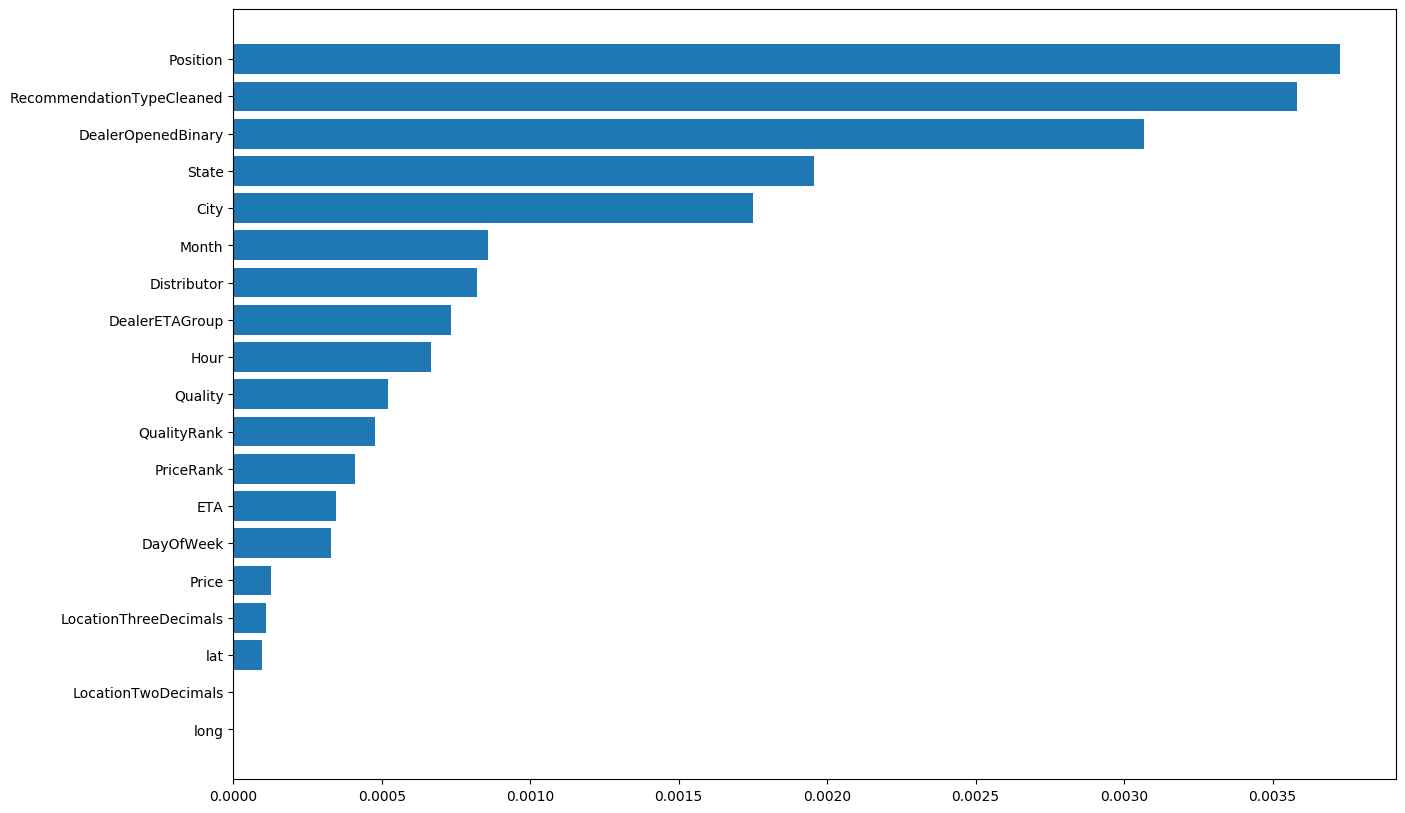

In [106]:
feature_selection_df = pd.DataFrame(data={"feature": X_train.columns, "score": fs.scores_}).sort_values(by=["score"], ascending=[True])
fig, ax = plt.subplots(figsize=(15,10))
plt.barh(feature_selection_df["feature"], feature_selection_df["score"])
plt.show()

In [107]:
X_train_final, X_test_final, fs = select_features(X_train_enc, y_train_enc, X_test_enc, k = 14)

### Approach 2 for feature selection:
By calculating feature importance of categorical and numeric variables using preliminary modeling with Random Forest implementation by H2O that can handle categorical variables

In [108]:
h2o.init(max_mem_size="256M")
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,2 mins 26 secs
H2O cluster timezone:,Europe/Amsterdam
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_atharva_wiqxe8
H2O cluster total nodes:,1
H2O cluster free memory:,218.9 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [109]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [110]:
train_search_id = pd.Series(df["SearchId"].unique()).sample(frac=0.7, random_state=7)

In [111]:
test_search_id = [search_id for search_id in df["SearchId"].unique() if search_id not in train_search_id]

In [112]:
attributes_to_drop = ["EventTimestamp", "SearchId", "DealerId", "deviceid", "GeoPoint", "DealerOpened", "RecommendationType"]

In [113]:
df_train = df.query("SearchId in @train_search_id")

In [114]:
df_test = df.query("SearchId in @test_search_id")

In [115]:
hf_train = h2o.H2OFrame(df_train.drop(attributes_to_drop, axis=1))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [116]:
hf_train.columns

['Distributor',
 'DealerETAGroup',
 'Price',
 'Quality',
 'Position',
 'lat',
 'long',
 'Conversion',
 'LocationTwoDecimals',
 'LocationThreeDecimals',
 'PriceRank',
 'QualityRank',
 'ETA',
 'RecommendationTypeCleaned',
 'DealerOpenedBinary',
 'DayOfWeek',
 'Month',
 'Hour',
 'City',
 'State']

In [117]:
input_vars = [col for col in hf_train.columns if col != "Conversion"]

In [118]:
target_var = "Conversion"

In [119]:
X_train = hf_train[input_vars]

In [120]:
y_train = hf_train["Conversion"]

In [121]:
rf = H2ORandomForestEstimator(model_id="rf_v1",
                             ntrees=200,
                             seed=7)

In [122]:
rf.train(input_vars, target_var, training_frame=hf_train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


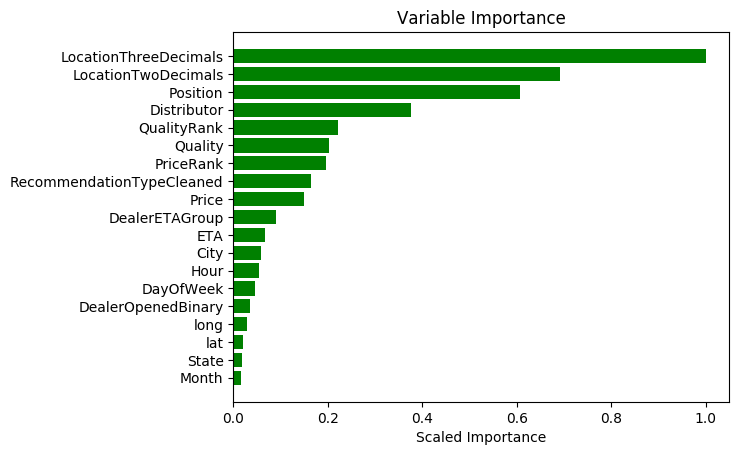

In [123]:
plt.rcdefaults()
fig, ax = plt.subplots()
variables = rf._model_json['output']['variable_importances']['variable']
y_pos = np.arange(len(variables))
scaled_importance = rf._model_json['output']['variable_importances']['scaled_importance']
ax.barh(y_pos, scaled_importance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()